In [1]:
from micecat_auto import *

In [8]:
# automatically query MICECAT data in a list of icat, and save in
# mypaths['MCcatdat'] + 'all_fields/' + 'micecat_%d.csv.bz2'%icat

#run_micecat_query(np.arange(241,400))

In [9]:
# run 2-halo stacking, in batch of 20 MICECAT fields

#run_micecat_auto_batch(1,0,istart=200)

## check missing file

In [2]:
from ciber_info import *
icat_arr = np.arange(0,400)
for icat in icat_arr:
    fdir = mypaths['MCcatdat'] + 'all_fields/'
    fname = 'micecat_%d.csv.bz2'%icat
    if fname not in os.listdir(mypaths['MCcatdat'] + 'all_fields/'):
        print(fname + 'does not exist!')

/Users/ytcheng/anaconda3/lib/python3.5/site-packages/matplotlib/ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


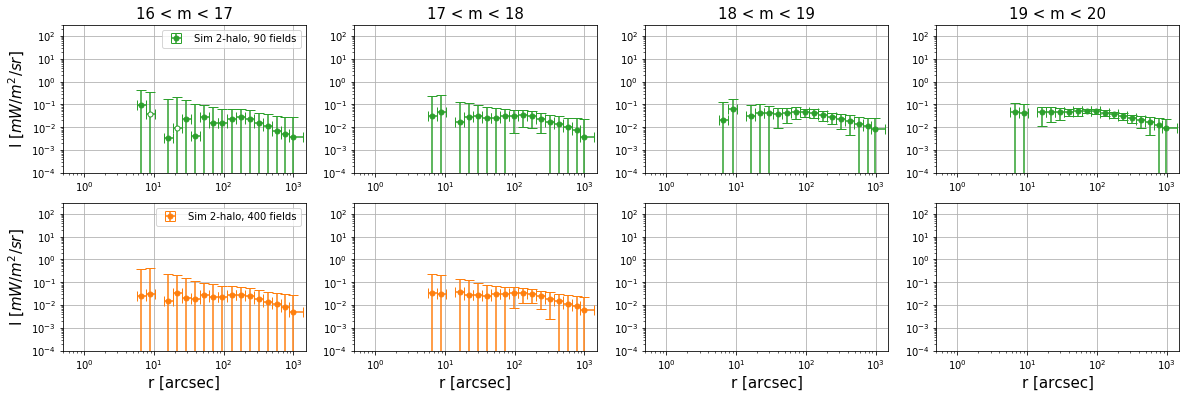

In [13]:
from utils import *
from micecat import *
from micecat_auto import *

for inst in [1]:
    fig, ax = plt.subplots(2, 4, figsize = (20,6))
    for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):

        rbins, mc_avg, mc_std, _ = get_micecat_sim_cen(inst, im, filt_order=0, sub=False)
        plot_err_log(rbins, 
                 mc_avg, mc_std,
                 ax=ax[0][im], color='C2',label='Sim 2-halo, 90 fields')
        
        rbins, mc_avg, mc_std, _ = get_micecat_sim_cen_auto(inst, im, filt_order=0, sub=False)
        plot_err_log(rbins, 
                 mc_avg, mc_std,
                 ax=ax[1][im], color='C1',label='Sim 2-halo, 400 fields')

        ax[0][im].set_ylim([1e-4,3e2])
        ax[0][im].set_xlim([5e-1,1.5e3])
        ax[0][im].set_title('%d < m < %d'%(m_min, m_max), fontsize=15)
        ax[0][im].grid()    
        
        ax[1][im].set_ylim([1e-4,3e2])
        ax[1][im].set_xlim([5e-1,1.5e3])
        ax[1][im].grid()    
        ax[1][im].set_xlabel('r [arcsec]', fontsize=15)

    ax[0][0].set_ylabel('I [$mW/m^2/sr$]', fontsize=15)
    ax[0][0].legend(fontsize=10)
    ax[1][0].set_ylabel('I [$mW/m^2/sr$]', fontsize=15)
    ax[1][0].legend(fontsize=10)

# fig.savefig('/Users/ytcheng/Desktop/morefields.png',
#              dpi = 150, bbox_inches='tight')

In [ ]:
stacking(1,4,16,17,filt_order=2);stacking(1,4,17,18);stacking(1,4,18,19);stacking(1,4,19,20)
stacking(1,5,16,17,filt_order=2);stacking(1,5,17,18);stacking(1,5,18,19);stacking(1,5,19,20)
stacking(1,6,16,17,filt_order=2);stacking(1,6,17,18);stacking(1,6,18,19);stacking(1,6,19,20)
stacking(1,7,16,17,filt_order=2);stacking(1,7,17,18);stacking(1,7,18,19);stacking(1,7,19,20)
stacking(1,8,16,17,filt_order=2);stacking(1,8,17,18);stacking(1,8,18,19);stacking(1,8,19,20)
stacking(2,4,16,17,filt_order=2);stacking(2,4,17,18);stacking(2,4,18,19);stacking(2,4,19,20)
stacking(2,5,16,17,filt_order=2);stacking(2,5,17,18);stacking(2,5,18,19);stacking(2,5,19,20)
stacking(2,6,16,17,filt_order=2);stacking(2,6,17,18);stacking(2,6,18,19);stacking(2,6,19,20)
stacking(2,7,16,17,filt_order=2);stacking(2,7,17,18);stacking(2,7,18,19);stacking(2,7,19,20)
stacking(2,8,16,17);stacking(2,8,17,18);stacking(2,8,18,19);stacking(2,8,19,20)

1.2213273926739803 10.538365289703124 137.08152178859262


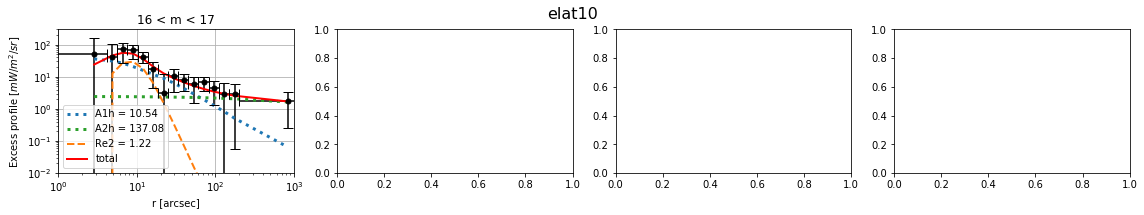

In [12]:
from run_fit import *

inst = 1

for ifield in [4]:
    fig, ax = plt.subplots(1, 4, figsize = (16,3))
    for im in range(1):
        param_fit = fit_stacking_mcmc(inst, ifield, im, data_maps=data_maps)
        fitparamdat = get_mcmc_fit_params_3par(inst,im, ifield=ifield)
        Re2 = fitparamdat['Re2']
        A1h = fitparamdat['A1h']
        A2h = fitparamdat['A2h']
        r_arr = param_fit.rsubbins
        profd_arr = param_fit.profex_sub
        profd_err = np.sqrt(np.diag(param_fit.covsub))
        modelprof = param_fit.get_profexcess_model(Re2=Re2, A1h=A1h, A2h=A2h)
        profex_arr = modelprof['profex_sub']
        prof1h_arr = modelprof['prof1h_sub']
        prof2h_arr = modelprof['prof2h_sub']
        chi2 = param_fit.get_chi2(Re2=Re2, A1h=A1h, A2h=A2h)
        rbinedges = param_fit.rsubbinedges
        print(Re2,A1h,A2h)
        ax[im].loglog(r_arr, prof1h_arr,'C0:', lw=3, label='A1h = %.2f'%A1h)
        ax[im].loglog(r_arr, prof2h_arr,'C2:', lw=3, label='A2h = %.2f'%A2h)
        ax[im].loglog(r_arr, profex_arr,'C1--', lw=2, label='Re2 = %.2f'%Re2)
        ax[im].loglog(r_arr, profex_arr + prof1h_arr + prof2h_arr,'r-', lw=2,
                     label = 'total')
        
        plot_err_log(r_arr, 
                     profd_arr,
                     profd_err,
                     xedges = rbinedges,
                     ax=ax[im], color='k')


        ax[im].set_title('%d < m < %d'%(param_fit.m_min, param_fit.m_max))
        ax[im].set_ylim([1e-2,3e2])
        ax[im].set_xlim([1e0,1e3])
        ax[im].grid()
        ax[im].legend()
        ax[im].set_xlabel('r [arcsec]')
    ax[0].set_ylabel('Excess profile [$mW/m^2/sr$]')
    fig.suptitle(fieldnamedict[ifield], fontsize=16)

    plt.tight_layout()
#     plt.savefig('/Users/ytcheng/Desktop/profile_best_TM%d_%s.png'%(inst,param_fit.field), dpi = 150)